In [1]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use("dark_background")

In [2]:
X,y=datasets.make_regression(n_samples=100,n_features=1,noise=20,random_state=1234)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=4)

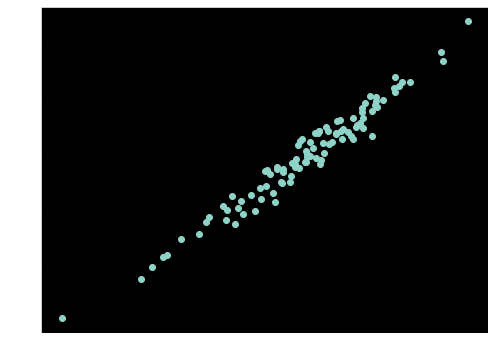

In [3]:
fig=plt.figure(figsize=(8,6))
plt.scatter(X[:,0],y)
plt.show()

In [4]:
from phe import paillier
public_key,private_key=paillier.generate_paillier_keypair()

In [5]:
enc_X_train=[]
for i in X_train:
    row_x=[]
    for j in i:
        k=public_key.encrypt(j)
        row_x.append(k)
    enc_X_train.append(row_x)

In [6]:
enc_y_train=[]
for i in y_train:
    p=public_key.encrypt(i)
    enc_y_train.append(p)

In [7]:
n_samples,n_attributes=X_train.shape
n_samples,n_attributes

(80, 1)

In [8]:
var1=1/n_samples
bias=0
weights=list(np.zeros(n_attributes))
lr=0.01
n_iters=1000

In [9]:
weights

[0.0]

In [10]:
for i in range(len(weights)):
    weights[i]=public_key.encrypt(weights[i])

In [11]:
weights

### Client Side Code:

In [12]:
noise=10

In [13]:
var1=var1*lr*-1
var1

-0.000125

In [14]:
def decrypt_initial_weights(weig):
    for i in range(len(weig)):
        weig[i]=private_key.decrypt(weig[i])
        weig[i]=weig[i]*noise

    return weig

In [15]:
def encrypt_prod_res(p_res):
    p_res=p_res*(1/noise)
    return p_res

### Server Side Code:

In [16]:
weights1=decrypt_initial_weights(weights)
weights1

[0.0]

In [17]:
y_pred_1=[]
for i in enc_X_train:
    summation=0
    for j,k in zip(i,weights1):
        p=j*k
        p=encrypt_prod_res(p)
        summation=summation+p
    y_pred_1.append(summation)

In [18]:
y_pred_1

In [19]:
y_pred=[]
for i in y_pred_1:
    p=i+bias
    y_pred.append(p)

In [20]:
y_pred[:5]

In [21]:
res=[]
for i,j in zip(y_pred,enc_y_train):
    q=j*(-1)
    p=i+q
    res.append(p)

In [22]:
for i in res[:5]:
    print(private_key.decrypt(i))

-4.725710345773317
-37.30331469641108
-9.846179767820677
4.746962016199478
-46.61433976388177


In [23]:
y_train[:5]

array([ 4.72571035, 37.3033147 ,  9.84617977, -4.74696202, 46.61433976])

#### calculating bias:

In [24]:
db=0
for i in res:
    db=db+i

db=db*var1
bias=bias+db
bias

In [25]:
private_key.decrypt(bias)

0.022853668059388148

#### calculating weights:

In [26]:
res2=decrypt_initial_weights(res)
res2[:5]

[-47.257103457733166,
 -373.03314696411076,
 -98.46179767820678,
 47.46962016199478,
 -466.14339763881776]

In [27]:
wei=[]
for i,j in zip(enc_X_train,res2):
    row_x=[]
    for k in i:
        p=k*j
        p=encrypt_prod_res(p)
        row_x.append(p)
    wei.append(row_x)

In [28]:
ww_a1=list(np.zeros(n_attributes))
for i in range(n_attributes):
    for j in wei:
        ww_a1[i]=ww_a1[i]+j[i]

In [30]:
for i in range(n_attributes):
    ww_a1[i]=ww_a1[i]*var1

In [31]:
for i in range(n_attributes):
    weights[i]=weights[i]+ww_a1[i]

In [32]:
for i in weights:
    print(private_key.decrypt(i))

0.9057266136571002
